# HOUSING: PRICE PREDICTION 

#### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset and checking shape and head of dataset 
df = pd.read_csv('train.csv')
print("Rows:",df.shape[0],"    columns:",df.shape[1])
pd.set_option("display.max_columns",None)
df.head(10)

Rows: 1168     columns: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,Gas

### Description of columns
- MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

- MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
- Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
- LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
- LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
- Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
- LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
- LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
- Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
- Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
- Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
- BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
- HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
- OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
- YearBuilt: Original construction date

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

- RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
- RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
- Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
- BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
- BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
- BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
- BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
- HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- CentralAir: Central air conditioning

       N	No
       Y	Yes
		
- Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
- 1stFlrSF: First Floor square feet
 
- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

- Kitchen: Kitchens above grade

- KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
- GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- GarageYrBlt: Year garage was built
		
- GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
- Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
- MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
- MiscVal: ($)Value of miscellaneous feature

- MoSold: Month Sold (MM)

- YrSold: Year Sold (YYYY)

- SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
- SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [3]:
# checking unwanted symbols in dataset
df.isin([' ','NA','?','-']).sum().any()

False

In [4]:
# checking duplicate rows
df.duplicated().sum()

0

In [5]:
# checking null values
pd.set_option("display.max_rows",None)
null_values = df.isna().sum().sort_values(ascending = False)
null_values

PoolQC           1161
MiscFeature      1124
Alley            1091
Fence             931
FireplaceQu       551
LotFrontage       214
GarageYrBlt        64
GarageFinish       64
GarageType         64
GarageQual         64
GarageCond         64
BsmtExposure       31
BsmtFinType2       31
BsmtQual           30
BsmtCond           30
BsmtFinType1       30
MasVnrType          7
MasVnrArea          7
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
TotRmsAbvGrd        0
GarageCars          0
LowQualFinSF        0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
GrLivArea           0
HeatingQC 

#### observation
- there are no unwanted columns in dataset
- there is no duplicate row in data set
- there are 18 columns which contain null values
- PoolQC, MiscFeature, Alley,Fence, FireplaceQu :                                                                             
  Out of these columns fireplaceQu has nearly 50 % null values i.e 551 out of 1168                                            
  PoolQC, MiscFeature, Alley,Fence these values has nearly 90 to 98 percent null values                             
  so, it's better to drop these columns

In [6]:
# dropping columns containing nunll values more than 50%
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu'],axis=1,inplace=True)

In [7]:
# analysing remaining columns to fill null values
col_null=['LotFrontage','GarageYrBlt','GarageFinish' ,'GarageType','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType','MasVnrArea']

<AxesSubplot:ylabel='LotFrontage'>

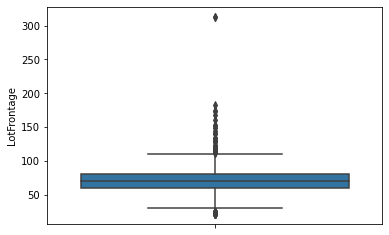

In [8]:
sns.boxplot( y = 'LotFrontage', data= df)

- as  'LotFrontage' has outliers so i'll fill the null values with median
- i'll fill remaining column's null value with mode as most of them are categorical and featues don't have value in decimal form

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [10]:
# checking null values again
df.isna().sum().sum()

0

- all the null values are filled or removed

In [11]:
# checking stats of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.50,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.00,190.0
LotFrontage,1168.0,70.807363,22.440317,21.0,60.00,70.0,79.25,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.50,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.00,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.00,2010.0
MasVnrArea,1168.0,101.696918,182.218483,0.0,0.00,0.0,160.00,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.50,5644.0


- By comparing 75% and max column we can conclude that some of the feature contain outliers.
- By looking at Mean & Median columns we can say that some of features are left skewed while others are right skewed.

In [12]:
# checking stats of object columns
df.describe(include=['O'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,5,2,4,4,1,5,3,25,9,8,5,8,6,8,14,15,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,928,1164,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,703,717,1022,516,547,1071,787,375,1033,1143,585,1090,1070,578,1085,755,551,1114,1125,1071,999,945


In [13]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [14]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

### Now let's clean test data

In [15]:
# Reading Test Dataset
dft = pd.read_csv('test.csv')

In [16]:
print('No. of Rows :',dft.shape[0])
print('No. of Columns :', dft.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
dft.head()

No. of Rows : 292
No. of Columns : 80


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [17]:
# checking missing value
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
missing_values

PoolQC           292
MiscFeature      282
Alley            278
Fence            248
FireplaceQu      139
LotFrontage       45
GarageType        17
GarageYrBlt       17
GarageQual        17
GarageCond        17
GarageFinish      17
BsmtCond           7
BsmtFinType2       7
BsmtFinType1       7
BsmtQual           7
BsmtExposure       7
MasVnrArea         1
MasVnrType         1
Electrical         1
HalfBath           0
BsmtFullBath       0
BsmtHalfBath       0
BedroomAbvGr       0
FullBath           0
TotRmsAbvGrd       0
Functional         0
KitchenAbvGr       0
KitchenQual        0
Id                 0
Fireplaces         0
LowQualFinSF       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
LandSlope    

In [18]:
# Removing columns with high missing value percentage
dft.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [19]:
dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].median())
dft['GarageType'] = dft['GarageType'].fillna(dft['GarageType'].mode()[0])
dft['GarageYrBlt']= dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mode()[0])
dft['GarageFinish']= dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual'] = dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond'] = dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])
dft['BsmtFinType2'] = dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['BsmtExposure'] = dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtCond'] = dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtQual'] = dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])
dft['MasVnrType'] = dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].median())
dft['Electrical'] = dft['Electrical'].fillna(dft['Electrical'].mode()[0])

In [20]:
dft.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [21]:
# cheking null values now
df.isna().sum().sum()

0

In [22]:
# Converting years column to age column
dft['Year_SinceBuilt'] = dft['YearBuilt'].max() - dft['YearBuilt']
dft['Year_SinceRemodAdded'] = dft['YearRemodAdd'].max() - dft['YearRemodAdd']
dft['Year_Since'] = dft['YrSold'].max() - dft['YrSold']
dft['GarageAge'] = dft['GarageYrBlt'].max() - dft['GarageYrBlt']

In [23]:
# Dropping old columns in train dataset
dft.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

### Exploratory Data Analysis

We know that lot of factors which influences in determination of housing price. One by One we will here explore different factors & its relation to target Variable SalePrice.

- How Zone affect House Price?
Location of House including infrastructure, availability of public utilities, Street Size & Street Type are vital for buying house in terms in determination of Price of house.

- MSZoning Description :-
MSZoning: Identifies the general zoning classification of the sale.                                           
                        
A    Agriculture                             
C    Commercial                                  
FV   Floating Village Residential               
I    Industrial                          
RH   Residential High Density               
RL   Residential Low Density                     
RP   Residential Low Density Park            
RM   Residential Medium Density            

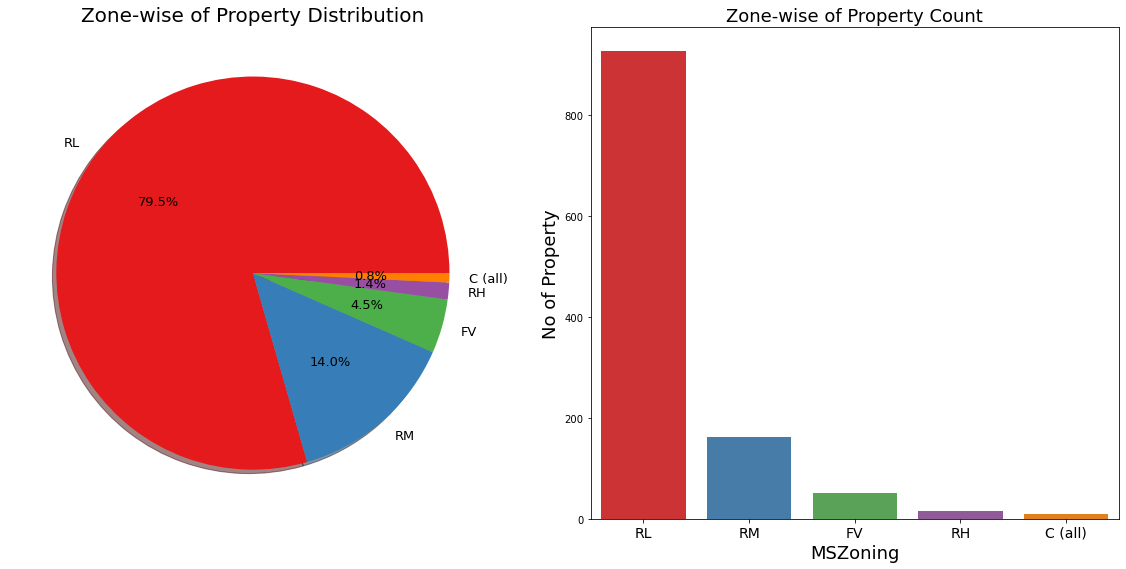

In [24]:
# Exploring MSZoning Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20 )
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18 )
ax[1].set_xlabel("MSZoning",fontsize=18 )
ax[1].set_ylabel("No of Property",fontsize=18 )
plt.xticks(fontsize=14 )
plt.show()


- 79.5% of House properties belongs to Low Density Residential Area followed by 14 % of properties belong to Medium Density Residential Area.
- Very Few property (0.8%) belongs to Commerical zone.

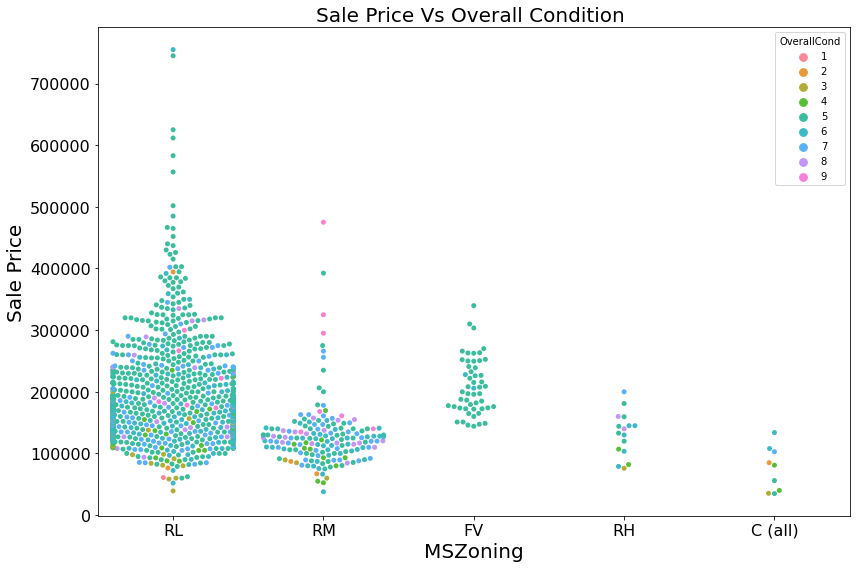

In [25]:
# Lets explore Zone relation with respect to Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['MSZoning'], hue =df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20)
plt.xlabel('MSZoning',fontsize = 20)
plt.ylabel('Sale Price',fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- Most of property for sale have overall condition rating of either 5 or 6.
- We already know of 80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.
- Cheapest properties are available in Commerical zone.
- Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low -price compare to others. This indicate that Overall Condition Rating is Not significant factor in determination of Sale price. Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.
-There may be other factors like Street Size or House Size may have major correlation with Sale Price.

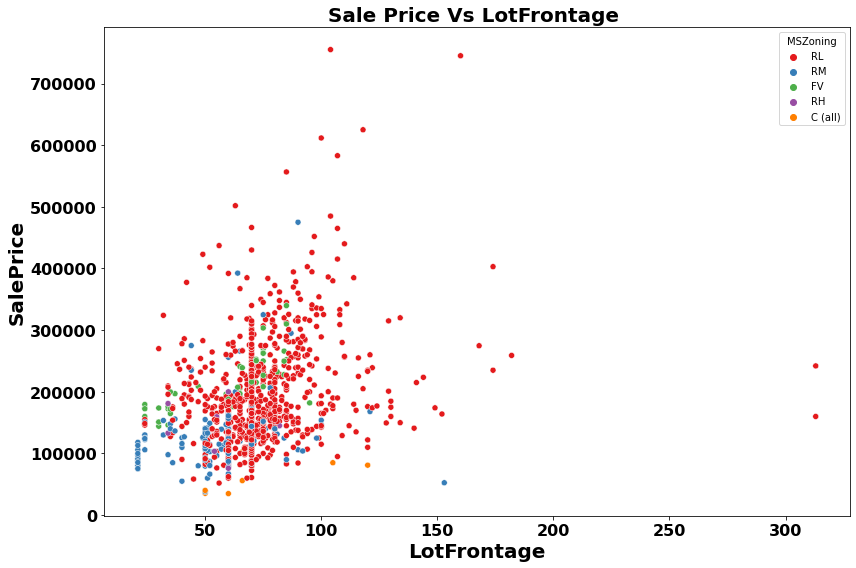

In [26]:
# LotFrontage: Linear feet of street connected to property

plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()


- With Exception of Commerical zone, As Lot Frontage area increase (which indicate Size of street connected to property) the Sale Price increases.

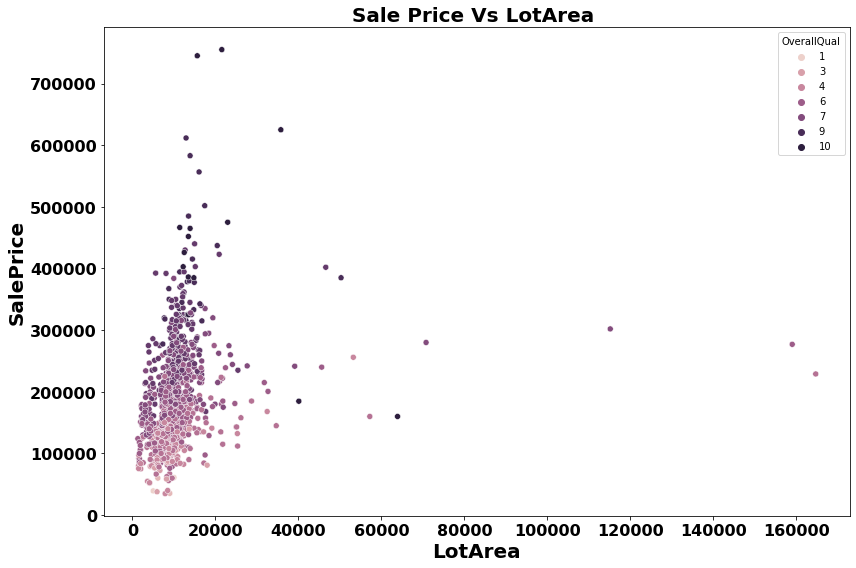

In [27]:
# How Quality & Area of house affect Pricing?
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

- There is No Significant relationship found between Sale price & Lot area.

As Overall Quality of House Increase the Sale Price of House also Increases.

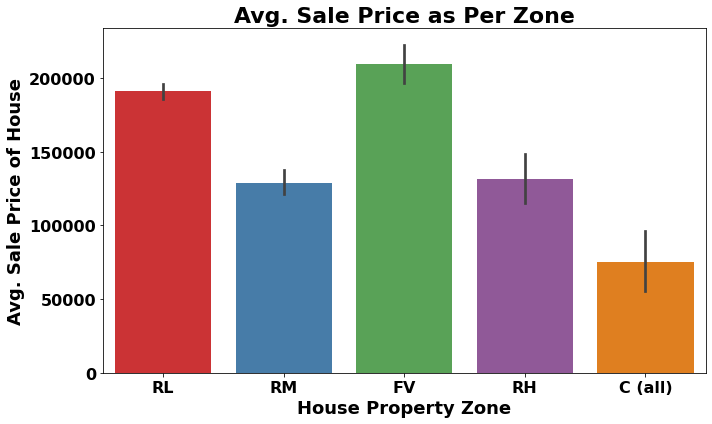

In [28]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = df['SalePrice'], x= df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

- In terms of Average Sale price house properties belonging to Floating Village Residential Zone are costiler than rest

#### Effect of Land characteristics on Sale Price

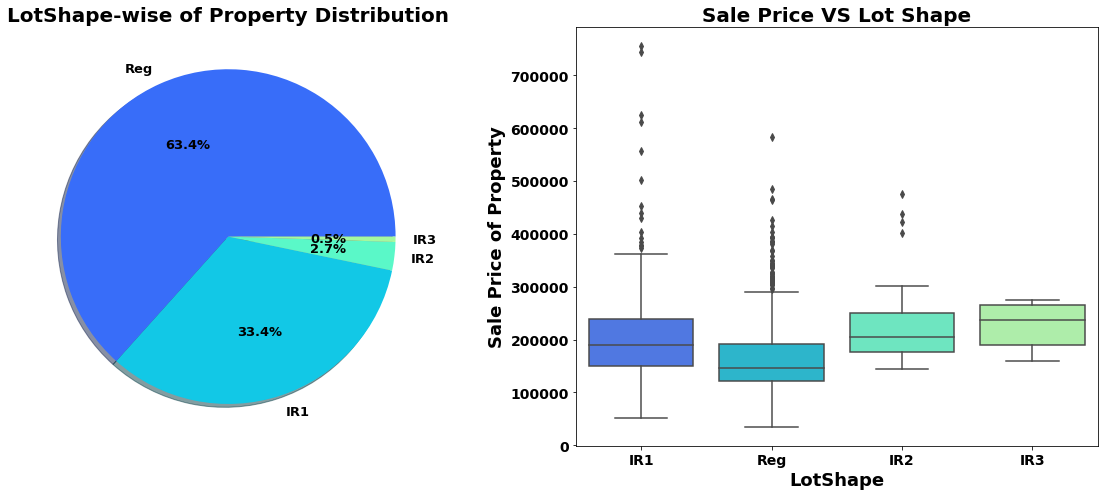

In [29]:
# Exploring LotShape Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotShape-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotShape",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- 63.4% house properties are regular in shape.
- Sale Price of property with slight irregular shape is higher than regular shape.

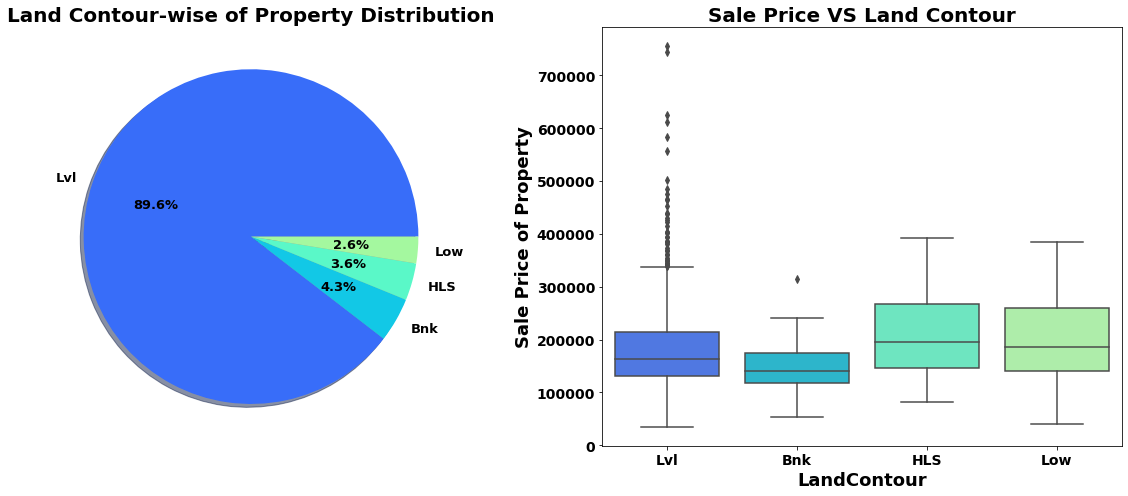

In [30]:
# Exploring LandContour Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandContour'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Land Contour-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandContour",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- 89.6% of House properties are near flat level surface.
- Also price for Flat level surface house is much higher than other land contour.

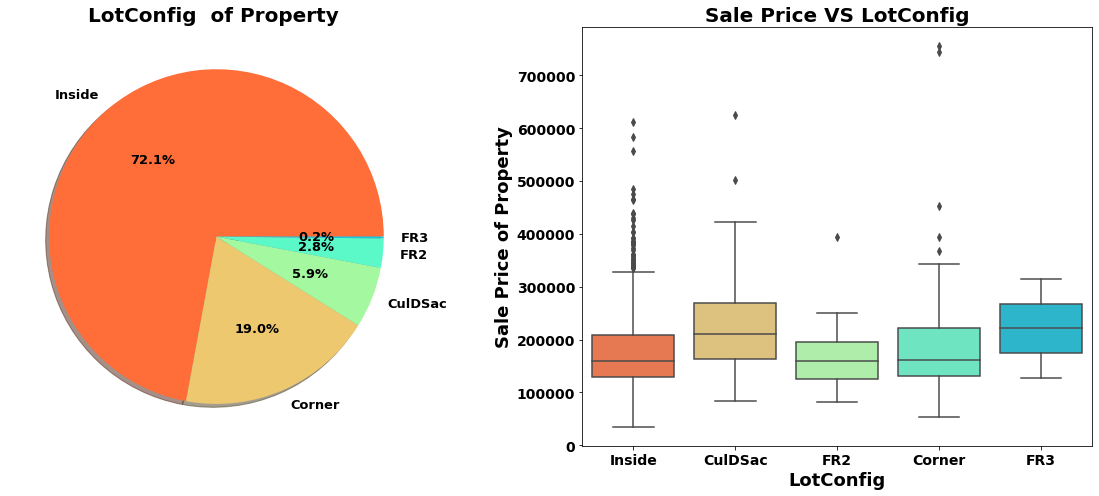

In [31]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotConfig'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotConfig",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- Around 72 % of house comes with inside Lot configuration.
- Cul-de-sac has maxmium Mean Sale Price among all lot configuration.
- Cheapest Houses belong to Inside lot configuration while Costlier houses belongs to Corner Lot Configuration.

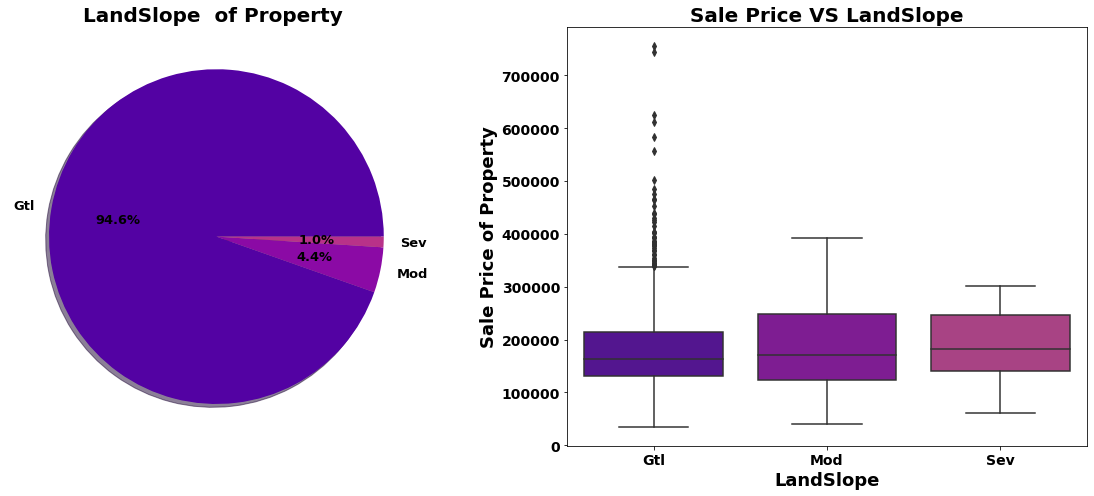

In [32]:
# Exploring LandSlope Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandSlope'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandSlope",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- Clearly we can see in boxplot that as Land slope increases the Sale price of house decreases.
- 1% properties come with severe slope and they come with low price compare to Gentle Slope properties.

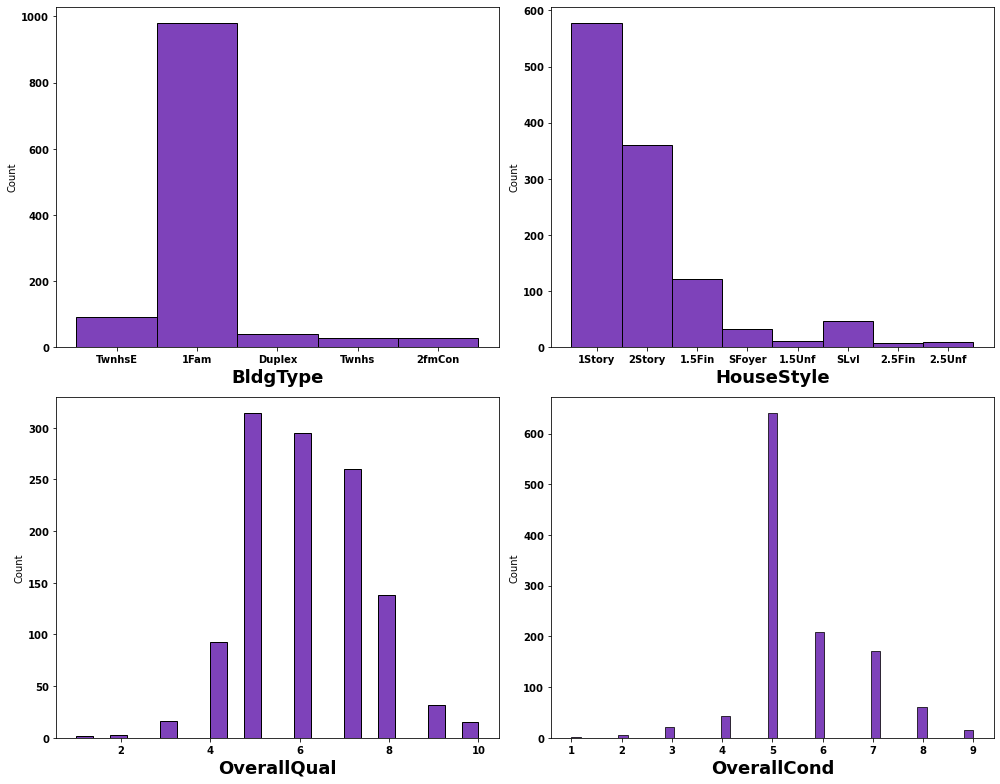

In [33]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

- More than 950 house properties are with building type Single-family Detached
- More than 50% of house properties comes with Overall Condition Rating of 5.
- More than 75% of house properties come with overall Quality Rating varies between 5 to 6.
- More than 500 House Properties comes with one story dwelling.

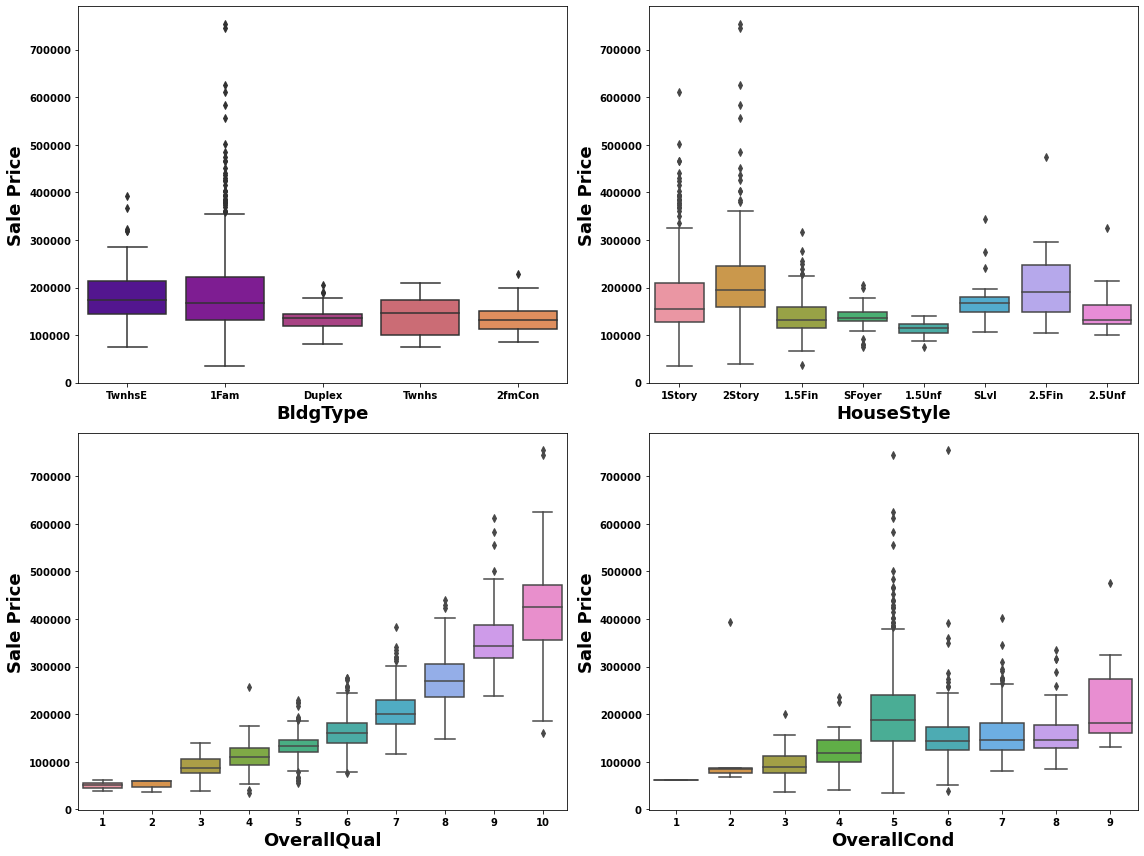

In [34]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

- **AS Overall Quality increases the sale price also increase with it.**

In [35]:
df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

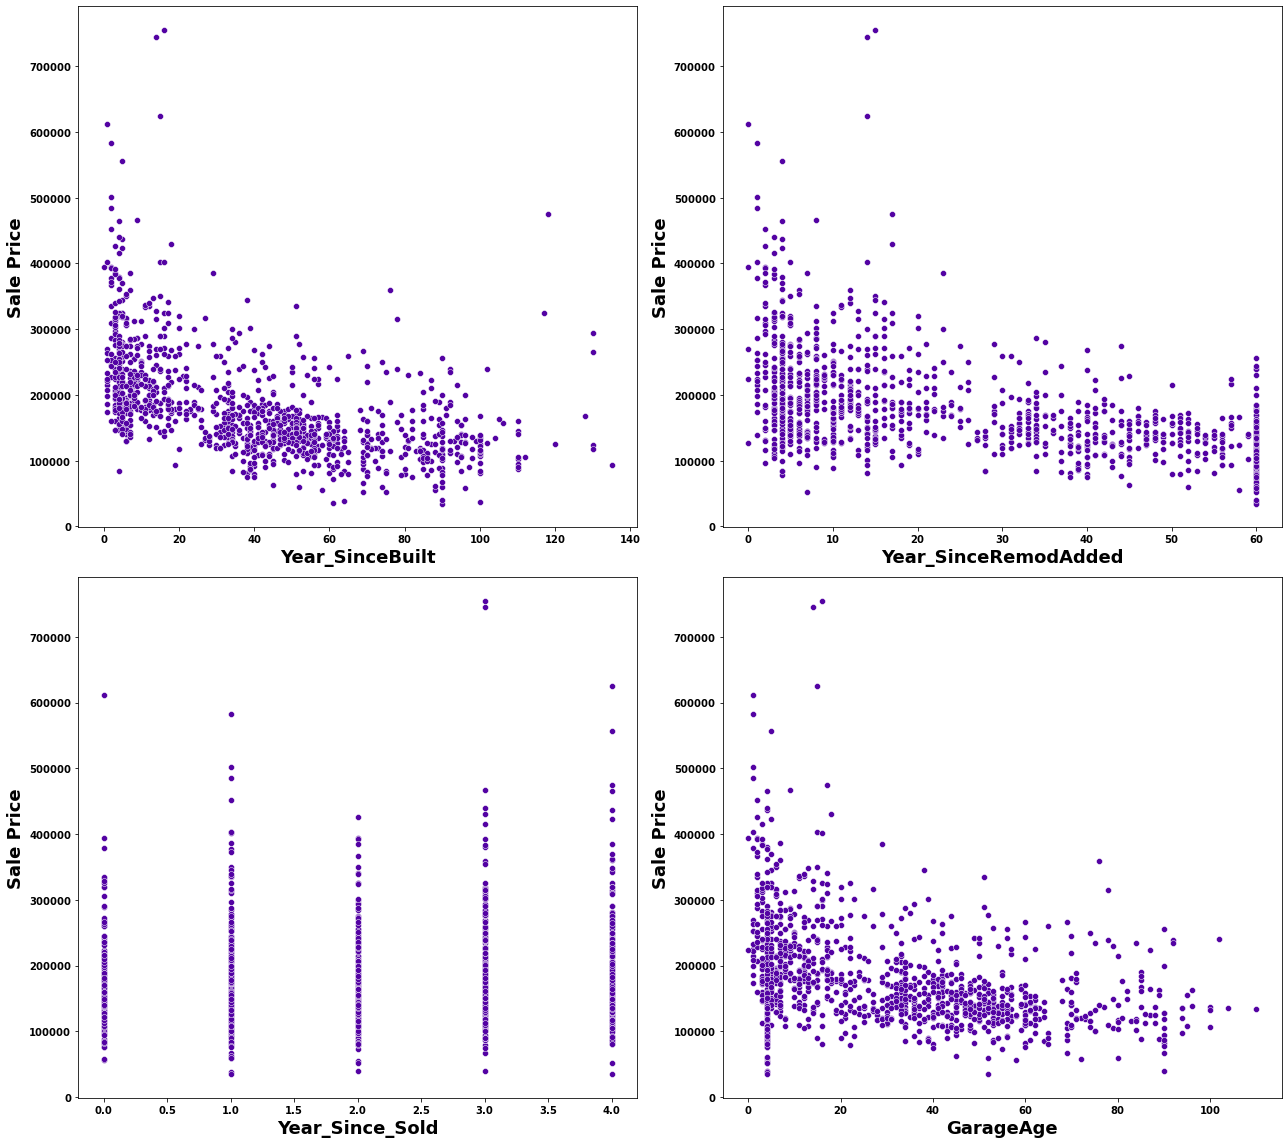

In [36]:
Feature_grp2 = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

- We can see that as Property get older with time its sale Price get depricates.
- 20 years after Remodelling Price of properties start decreases.
- Older the garage age less the price of Property.

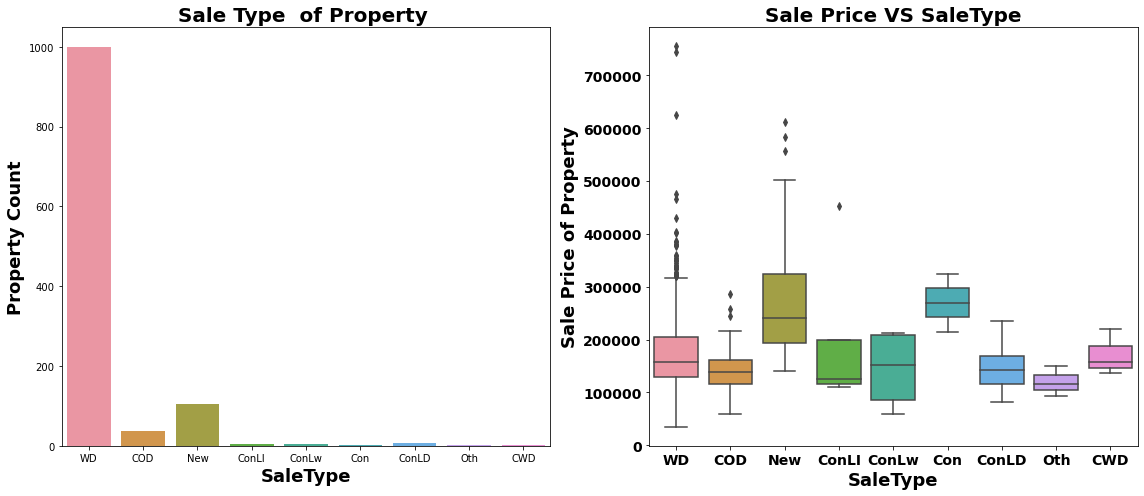

In [37]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleType',data=df,ax=ax[0])
ax[0].set_title('Sale Type  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- Around 1000 sales happen by Conventional Warranty Deed.
- Home just constructed and sold category are exceptionally much costiler than any one else.
- All loan based sale are below 300000.

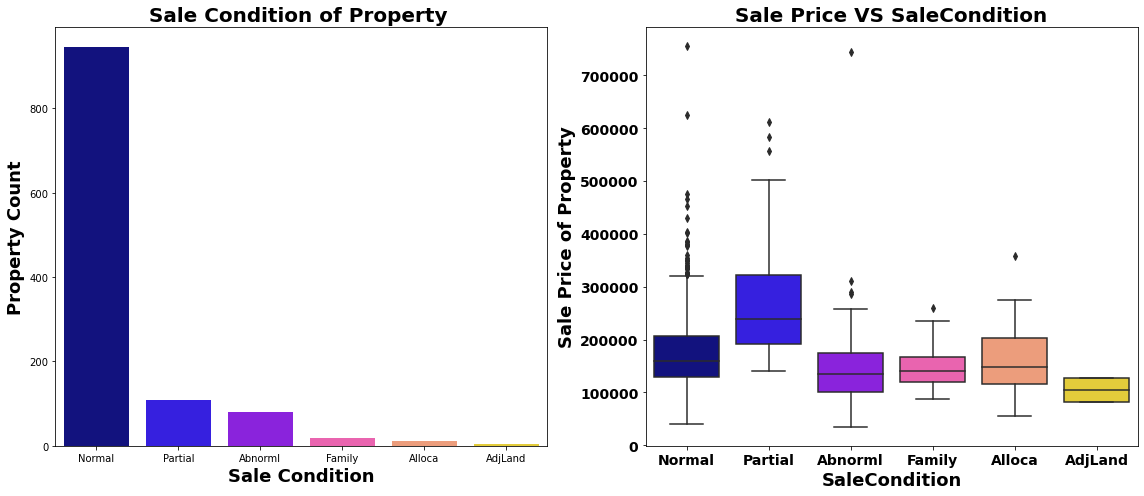

In [38]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleCondition',data=df,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- We can see that Sale with condition like Abnorml, Family, Alloca, AdjLand are below the price of 300000.
- Maximum Base Price for House comes from Partial category- Home was not completed when last assessed (associated with New Homes) is higher than rest.
- Minimum base price comes from Normal condition sale and also highest sale price comes from this category.


We also know as Quality Rating increase Price of House increase so we incorparate Overall Quality Rating in exploration.


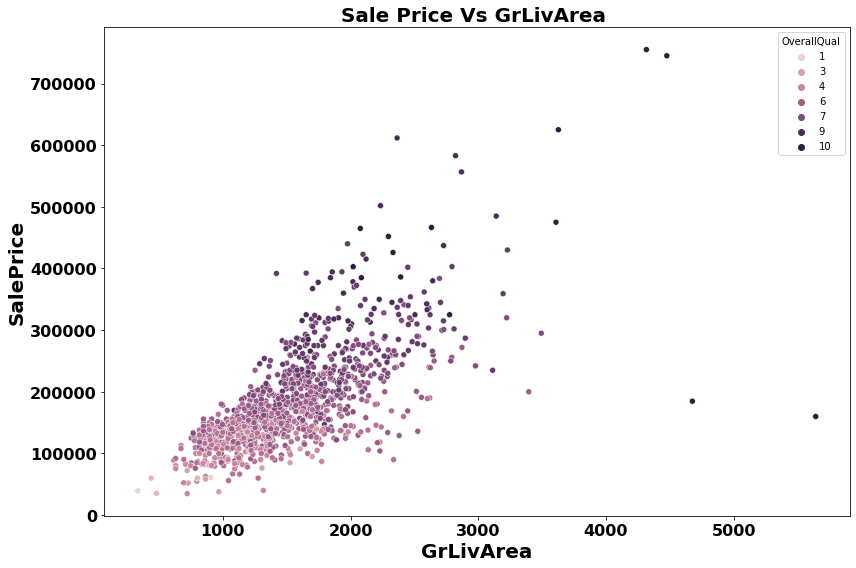

In [39]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs GrLivArea ",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

- In above plot we can clearly see relation between all three feature very clearly.
- As total floor area increases the sale price also get increases corresponding the overall quality of House.

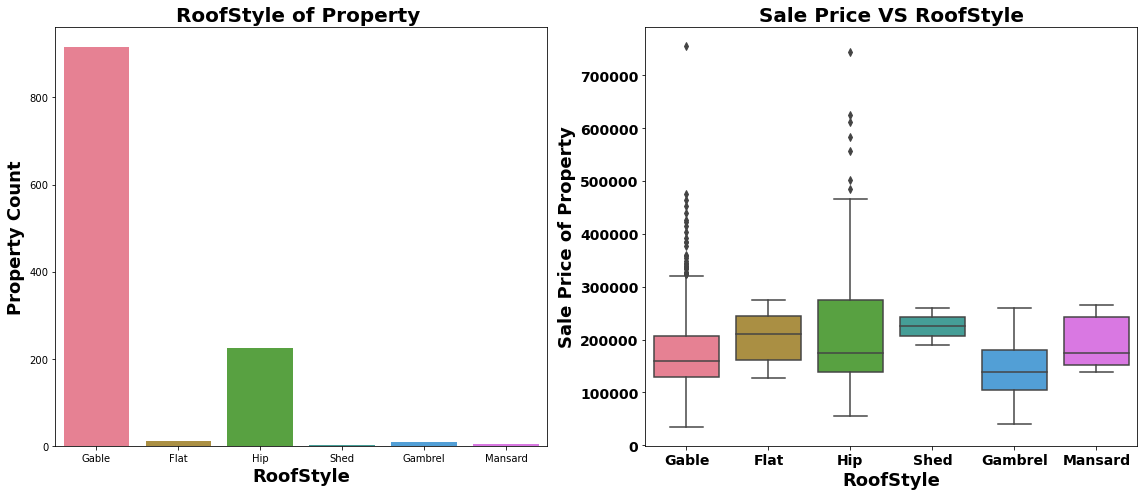

In [40]:
# Exploring RoofStyle Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('RoofStyle',data=df,ax=ax[0])
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofStyle'], ax=ax[1])
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- More than 75% House properties come with Gable Roof Style followed by around 15 % house properties with Hip Style.
- From Boxplot we can see that Hip style Roof are much costlier than remaining roof style.

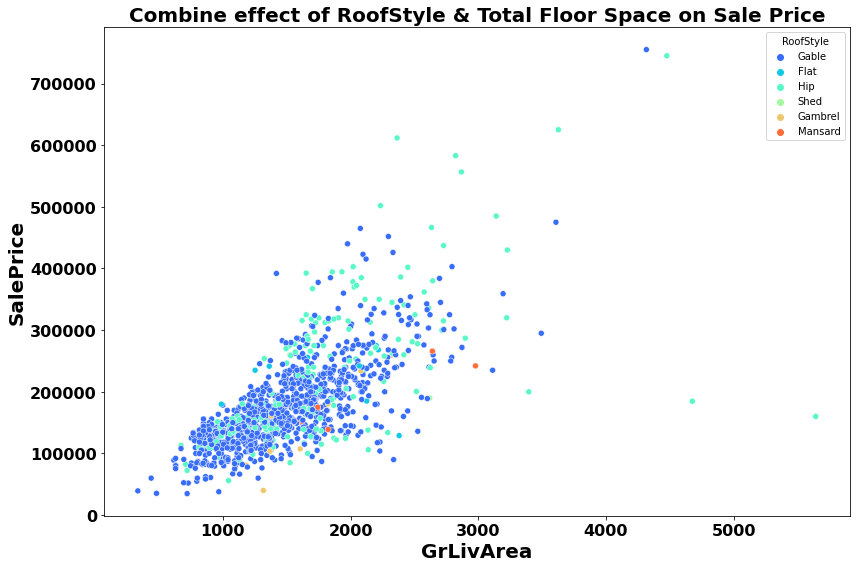

In [41]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofStyle'])
plt.title("Combine effect of RoofStyle & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

- For High floor area construction mainly Hip style Roof is used and invariably high cost properties mostly comes up with Hip Style Roof.

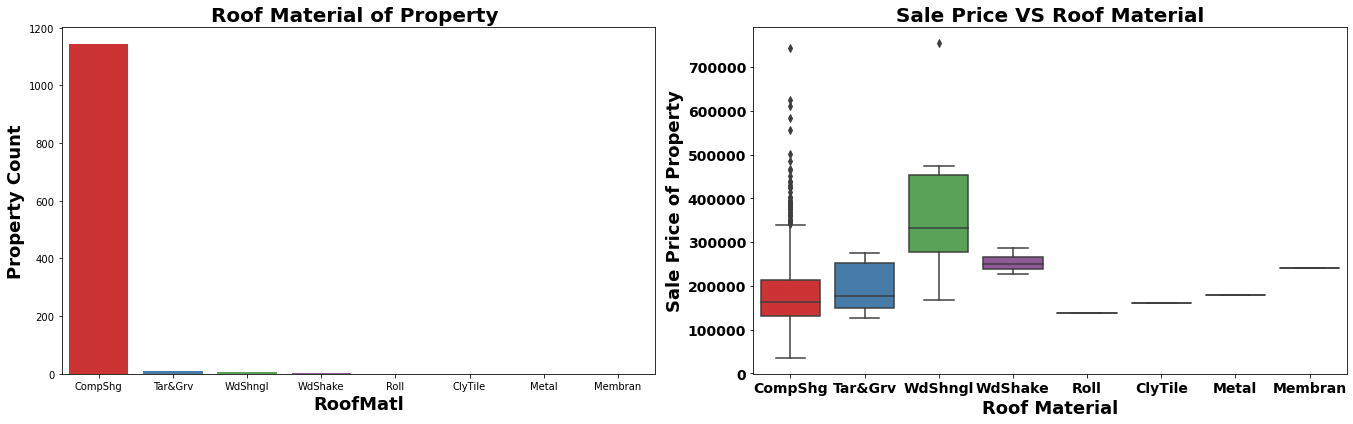

In [42]:
# Exploring RoofMatl Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(19,6))
sns.countplot('RoofMatl',data=df,ax=ax[0])
ax[0].set_title('Roof Material of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofMatl', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofMatl'], ax=ax[1])
ax[1].set_title('Sale Price VS Roof Material',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Roof Material",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()


- More than 90% Properties in Data set made with roof material of Standard (Composite) Shingle.
- Wood Shingles is Costiler Material compare to rest.

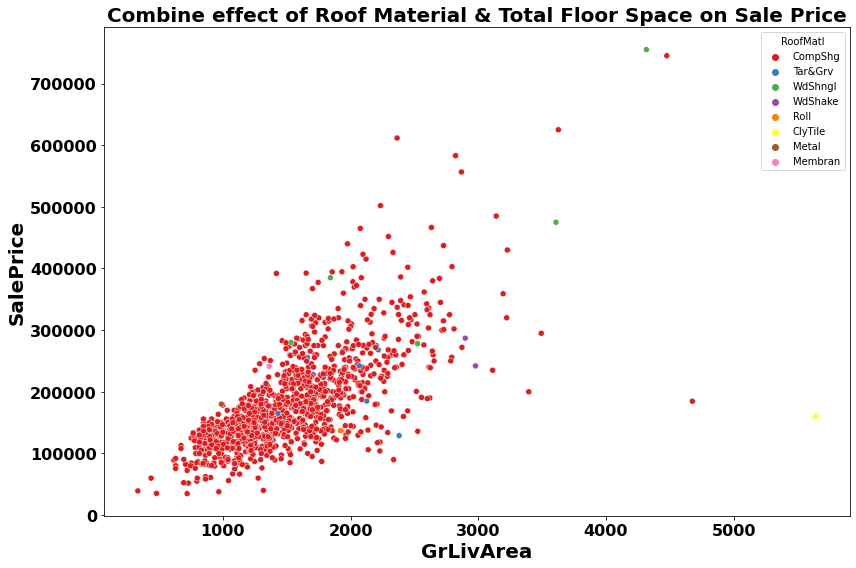

In [43]:
# Combine effect of RoofMatl & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofMatl'])
plt.title("Combine effect of Roof Material & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

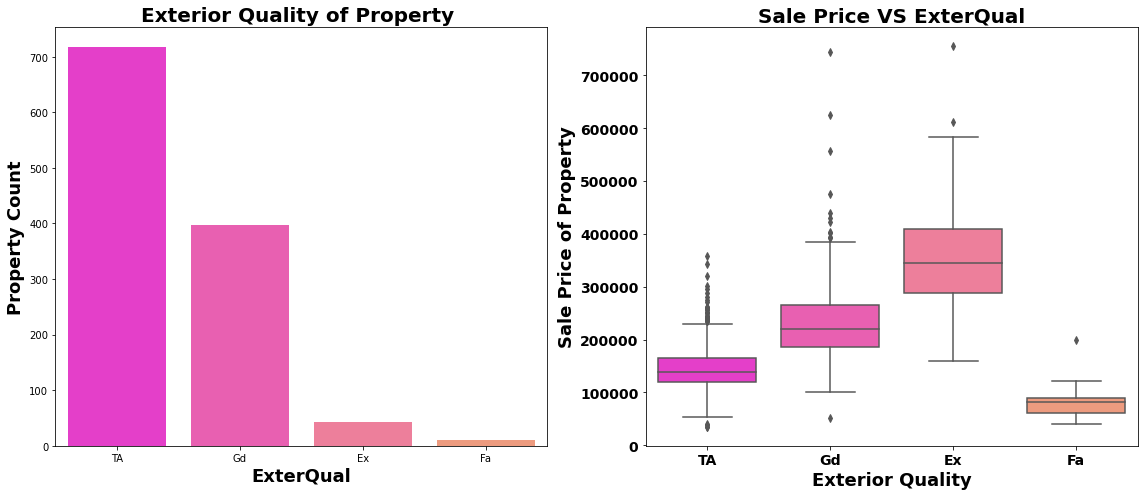

In [44]:
# Exploration of House Exterior covering features
Feature_grp3 = ["Exterior1st","Exterior2nd", "MasVnrType", "ExterQual", "ExterCond"]

# Exploring ExterQual Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterQual',data=df,ax=ax[0])
ax[0].set_title('Exterior Quality of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('ExterQual', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterQual'], ax=ax[1])
ax[1].set_title('Sale Price VS ExterQual',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior Quality",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- Around 60% of house properties come with Average Exterior quality and all of them below 400000.
- Very few House Properties comes with Excellent Exterior Quality.
- Costiler house properties come with Good & Excellent exterior quality.

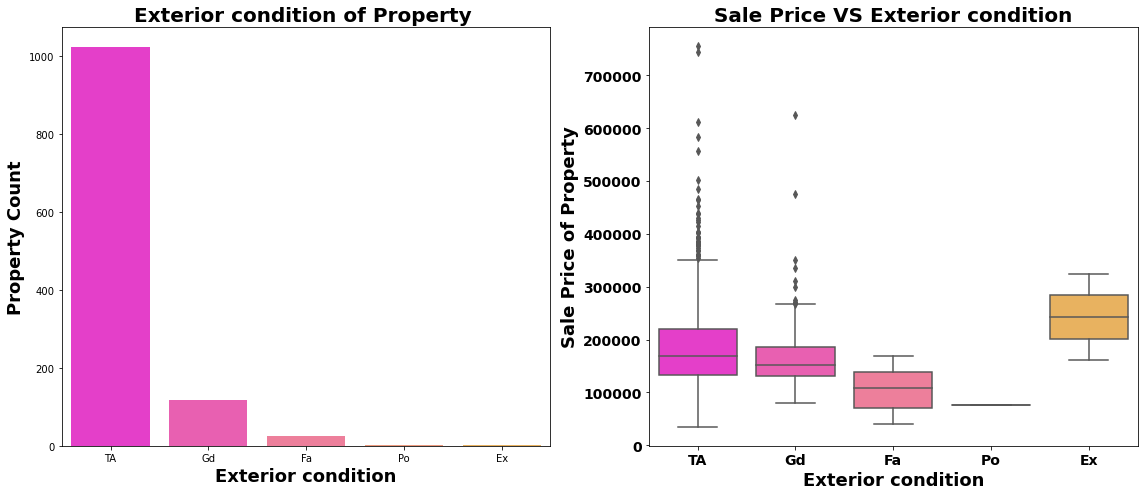

In [45]:
# Exploring Exterior condition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterCond',data=df,ax=ax[0])
ax[0].set_title('Exterior condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Exterior condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterCond'], ax=ax[1])
ax[1].set_title('Sale Price VS Exterior condition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior condition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

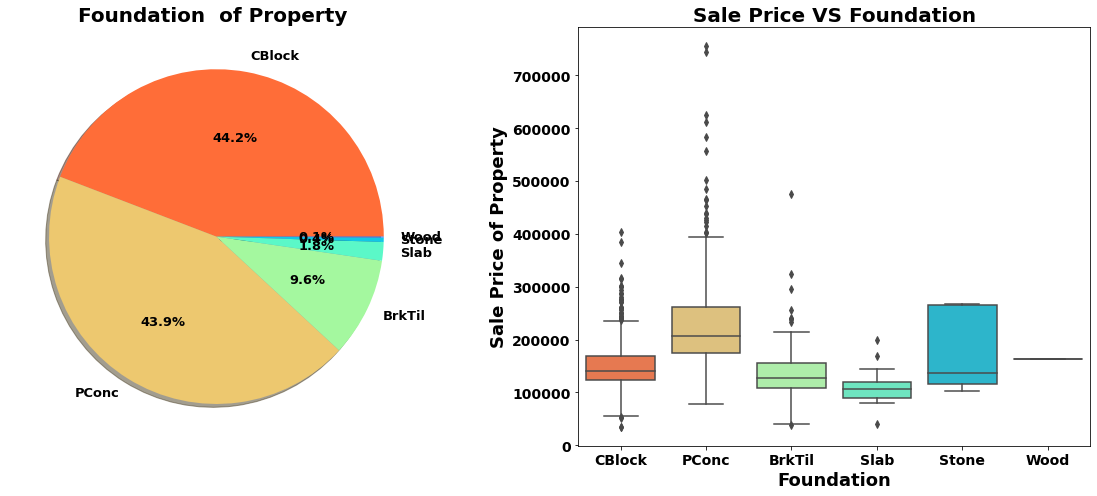

In [46]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Foundation'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Foundation  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['Foundation'], ax=ax[1])
ax[1].set_title('Sale Price VS Foundation',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Foundation",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

- 44.2% Properties with CBlock Foundation & 43.9% housing property come with PConc Foundation.
- Pconc Foundation are mostly use in costily housing properties.

In [47]:
Feature_grp4= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

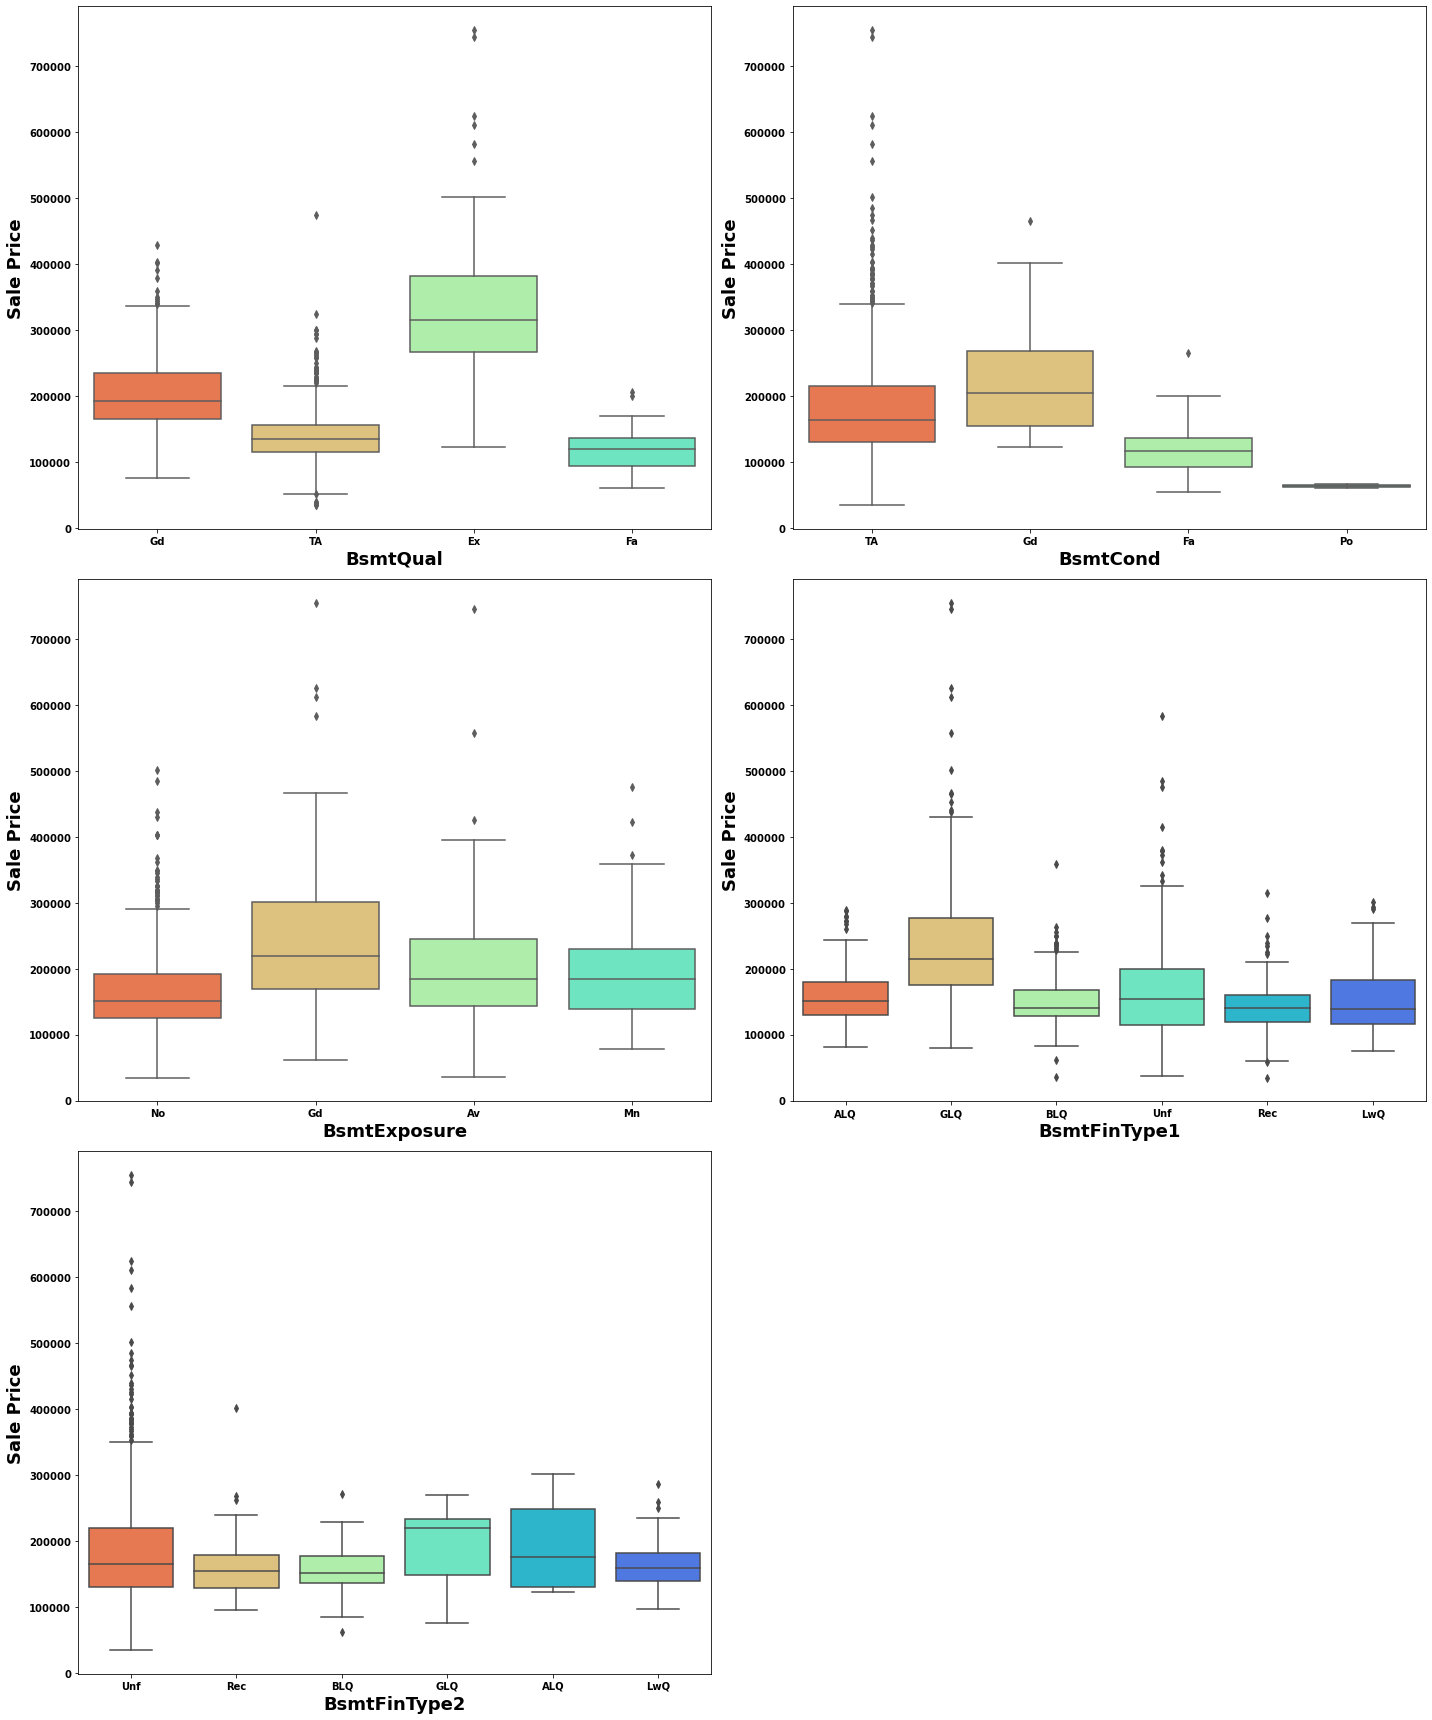

In [48]:
plt.figure(figsize=(20,24),facecolor='white')
plotnumber=1

for i in Feature_grp4:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

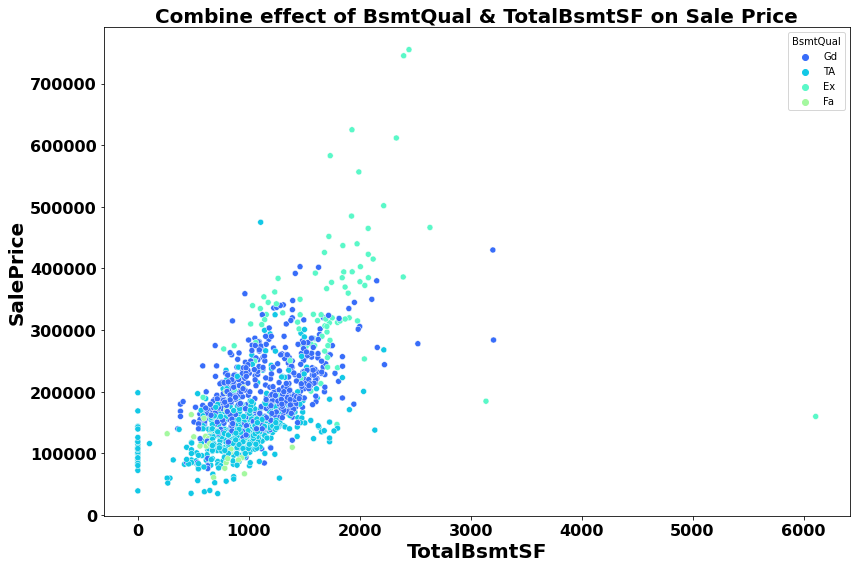

In [49]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['TotalBsmtSF'], hue =df['BsmtQual'])
plt.title("Combine effect of BsmtQual & TotalBsmtSF on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('TotalBsmtSF',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

- As Basement Quality increase in relatio to it sale Price increases.

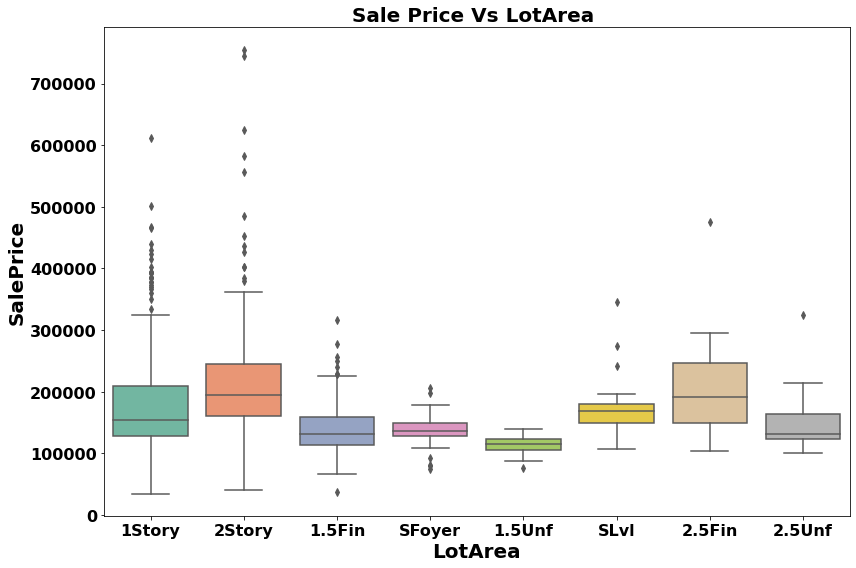

In [50]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set2')
plt.figure(figsize=(12,8))
sns.boxplot(y=df['SalePrice'], x=df['HouseStyle'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

- Two Story Building are costlier than remaining.

In [51]:
# Outliers Detection and Removal
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold'], float64: ['LotFrontage', 'MasVnrArea', 'GarageAge'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageTyp

In [52]:
# Grouping Numerical & Categorical features
Numerical_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold', 
                      'LotFrontage', 'MasVnrArea', 'GarageAge']

Categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

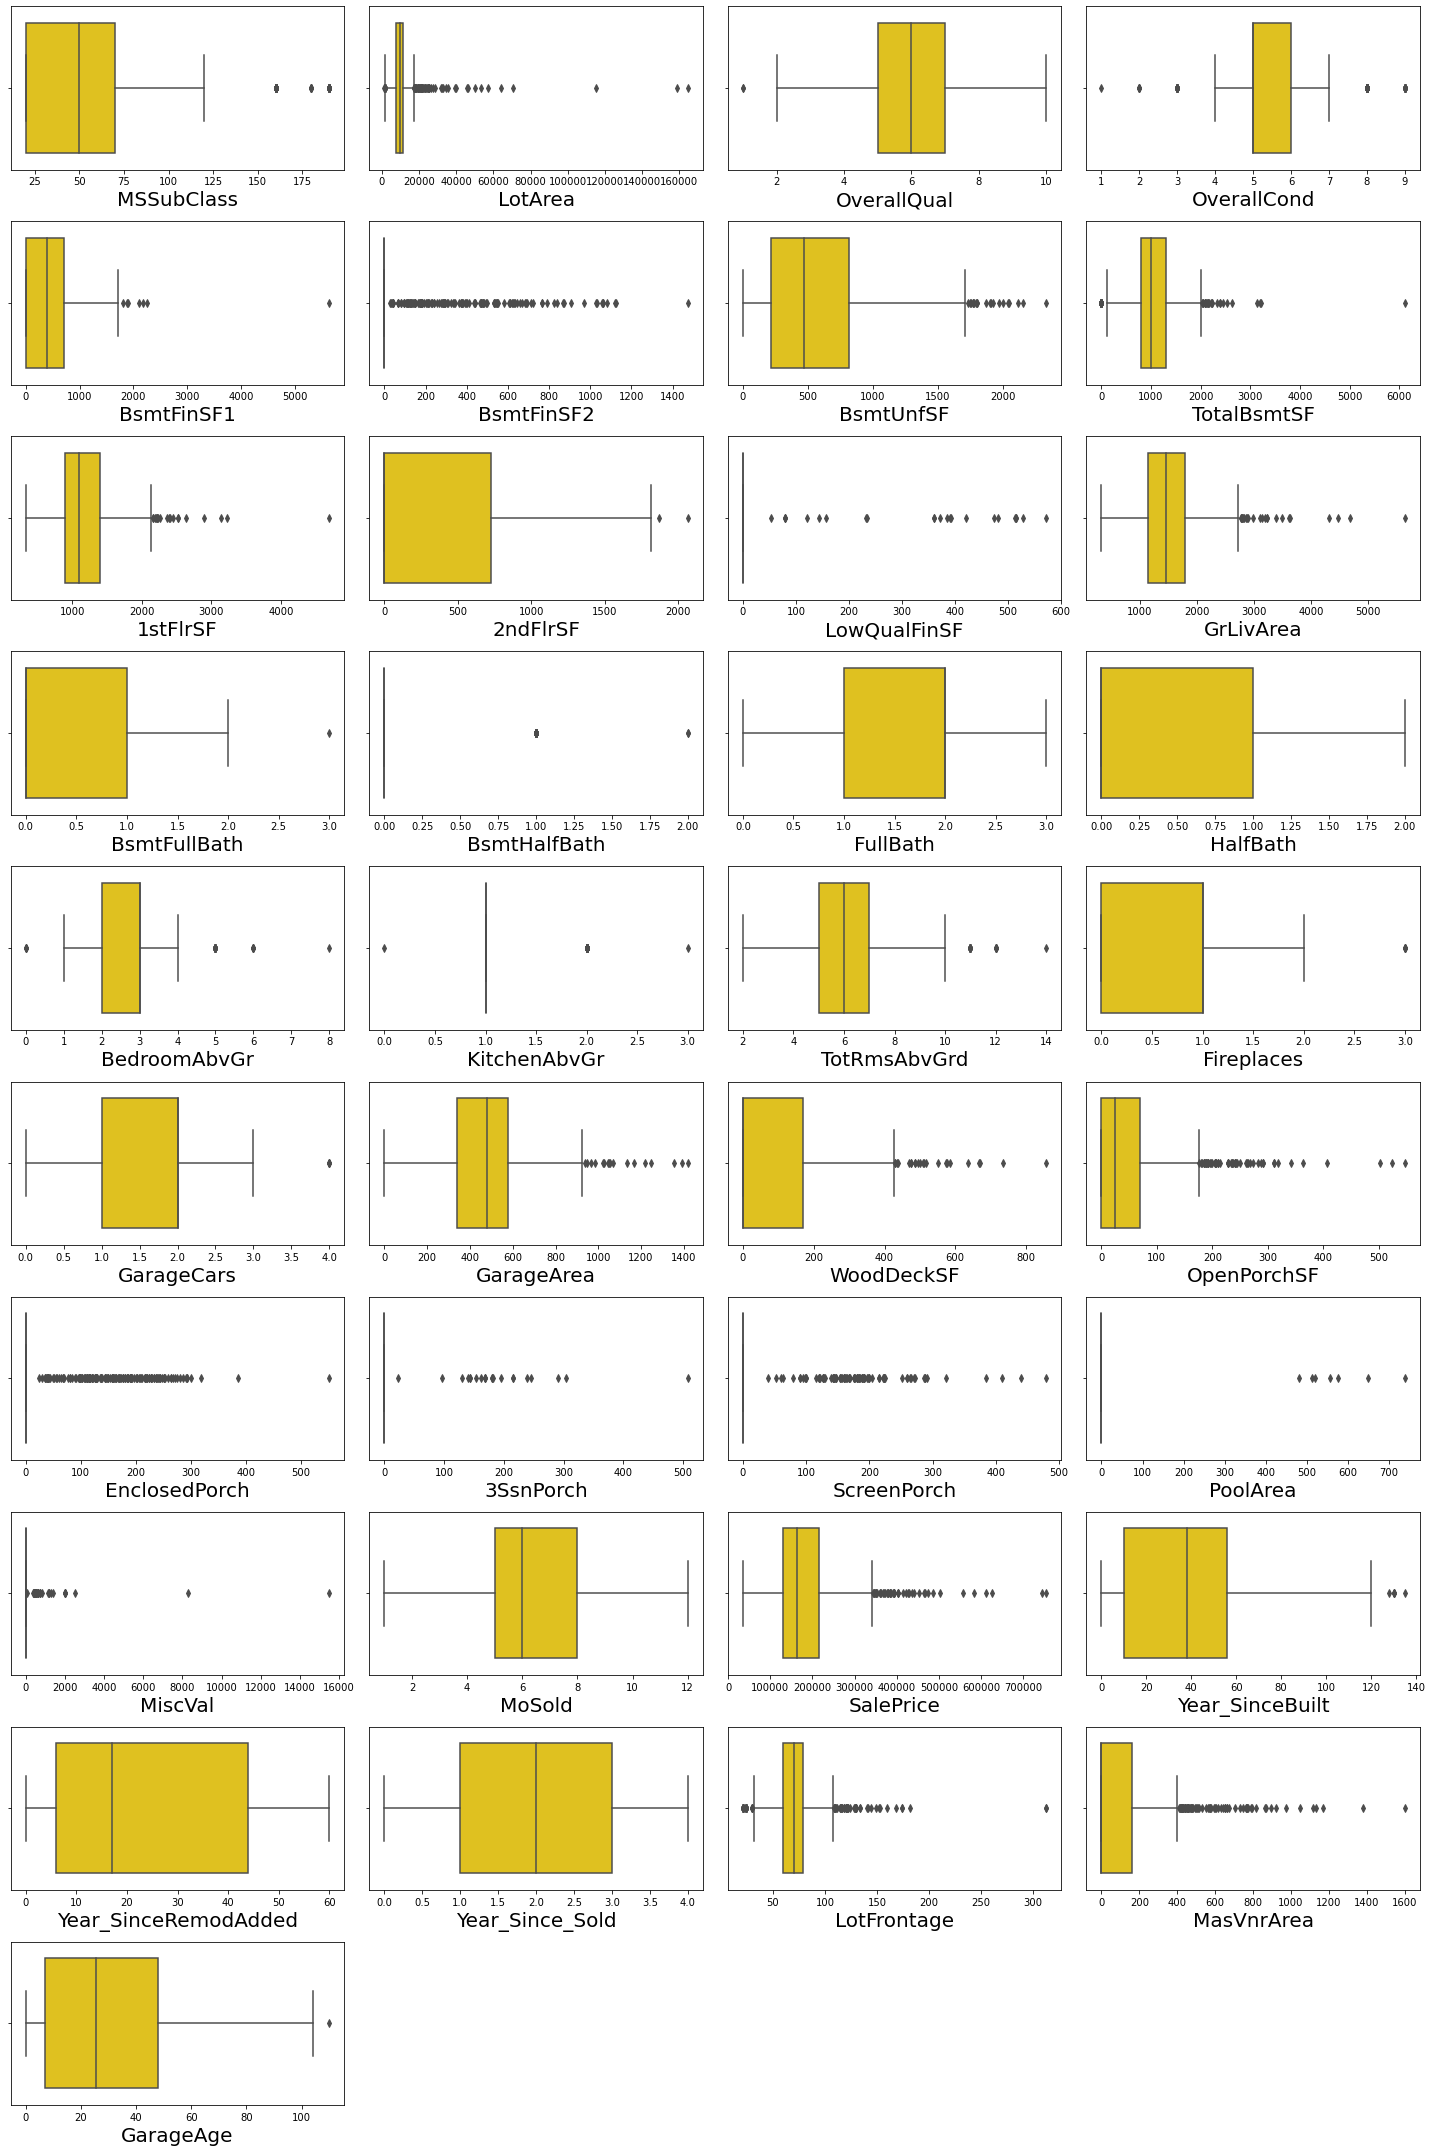

In [53]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- We can see lot of features contain outliers which are in upper bound limit i.e. extreme outliers. We also know that value present in dataset are realsitic in nature, so to gain accuracy of model we cannot afford large data loss.

- We will Not any remove outliers keeping in mindframe data belong in this dataset from 1875.

In [54]:
# Droping unnecessary column for further investigation
df.drop(['Id','Utilities'],axis=1,inplace=True)
dft.drop(['Id','Utilities'],axis=1,inplace=True)


- BsmtFinSF1: Type 1 finished square feet

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

TotalBsmtSF is sum of above remaining features. 
We will drop other three features for modelling.

In [55]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
dft.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet                                 
GrLivArea is sum of above remaining features. We will drop other three features for modelling.

In [56]:
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
dft.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

Some of the features contain lot of zeros (above 90 %), it will meaningless to keep them while model building.

- PoolArea - 1161 zeros out of 1168 entries
- MiscVal - 1126 zeros out of 1168 entries
- 3SsnPorch - 1146 zeros out of 1168 entries
- EnclosedPorch - 999 zeros out of 1168 entries
- ScreenPorch - 1073 zeros out of 1168 entries                     
We will drop these columns from dataset. 

In [57]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
dft.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

<AxesSubplot:>

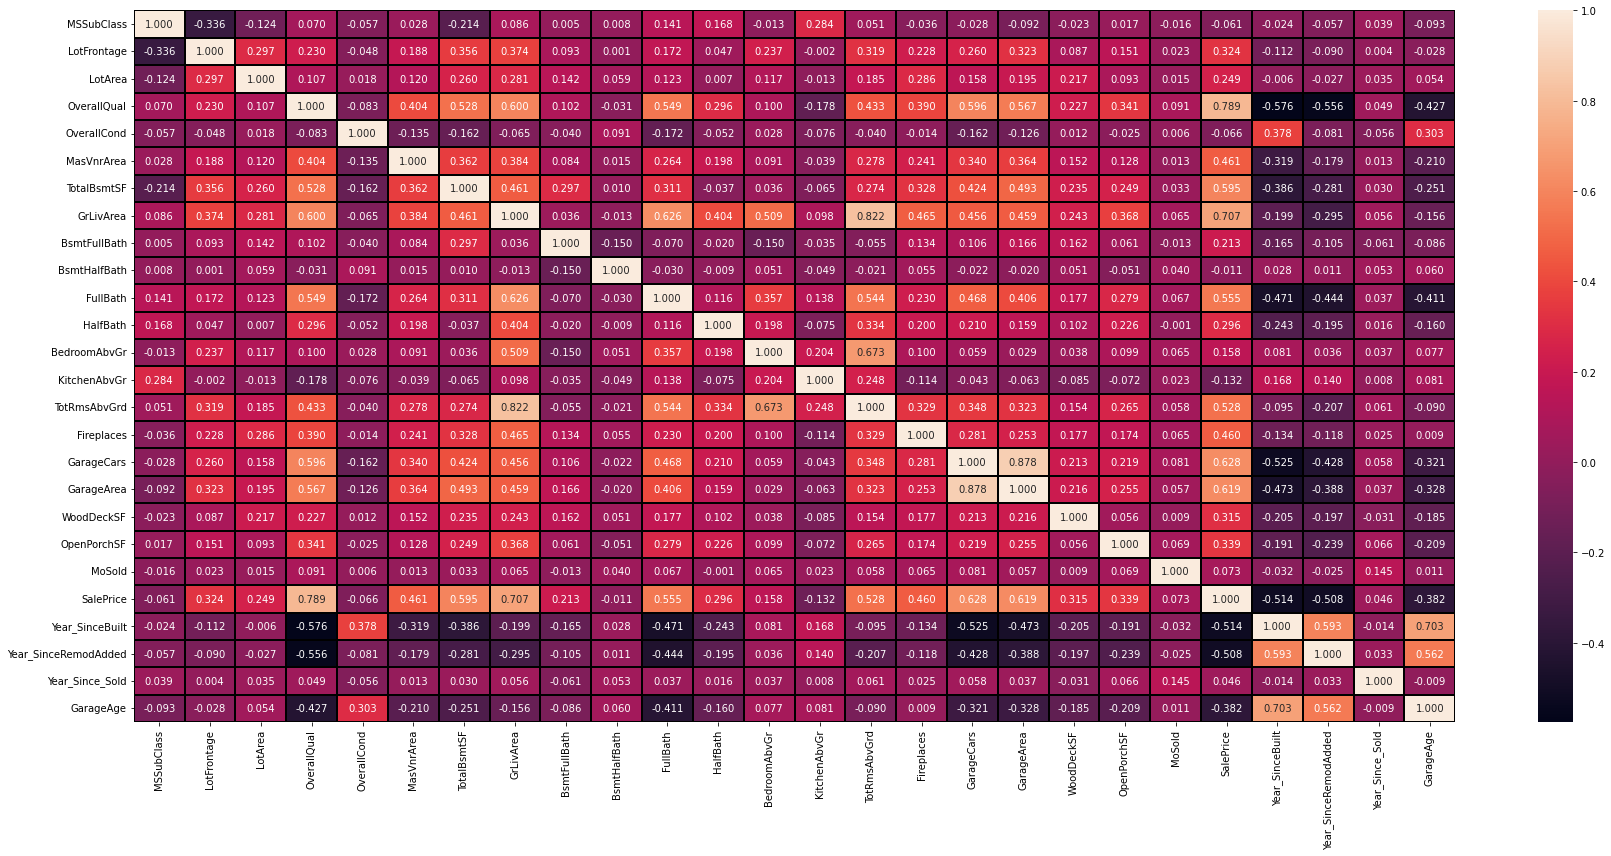

In [58]:
# checking correlation 
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.3f')

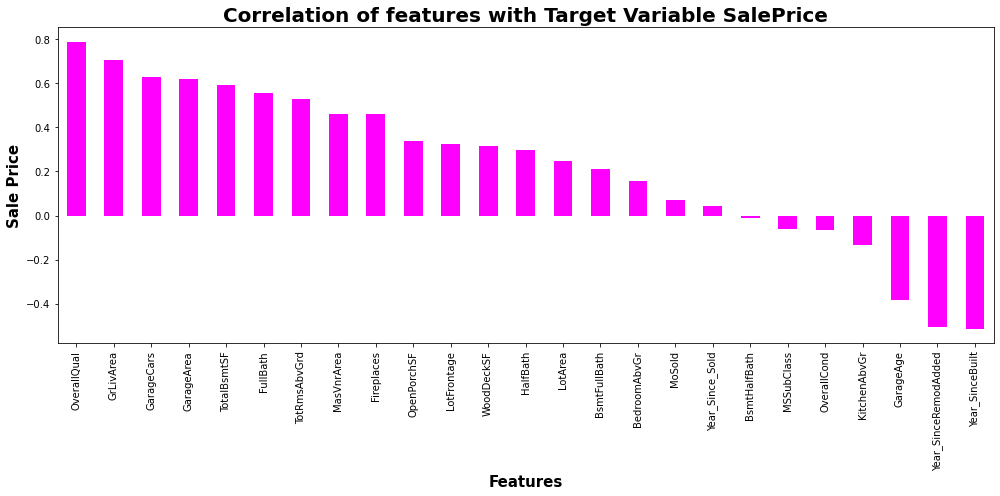

In [59]:
plt.figure(figsize = (14,7))
df.corr()['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Sale Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable SalePrice',fontsize = 20,fontweight='bold')
plt.tight_layout()
plt.show()

We can see that lot of features are highly correlated with target variable Sale Price.

In [60]:
##### training data
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,120,3,70.0,4928,1,0,3,4,0,13,2,2,4,2,6,5,1,1,8,9,2,0.0,3,4,1,2,3,3,0,5,1078,1,4,1,4,958,0,0,2,0,2,1,3,5,6,1,1,1,2,440,4,4,2,0,205,2,8,4,128000,34,34,3,33.0
1,20,3,95.0,15865,1,0,3,4,1,12,2,2,0,2,8,6,0,5,12,13,2,0.0,2,2,2,3,1,1,0,4,2217,1,0,1,4,2217,1,0,2,0,4,1,2,8,6,1,1,2,2,621,4,4,2,81,207,10,8,4,268000,40,40,3,40.0
2,60,3,92.0,9920,1,0,3,1,0,15,2,2,0,5,7,5,1,1,7,7,2,0.0,2,4,2,2,3,0,2,5,1117,1,0,1,4,2013,1,0,2,1,3,1,3,8,6,1,1,2,2,455,4,4,2,180,130,6,8,4,269790,14,13,3,13.0
3,20,3,105.0,11751,1,0,3,4,0,14,2,2,0,2,6,6,3,1,8,9,1,480.0,3,4,1,2,3,3,1,5,1844,1,0,1,4,1844,0,0,2,0,3,1,3,7,6,1,1,1,2,546,4,4,2,0,122,1,0,4,190000,33,33,0,33.0
4,20,3,70.0,16635,1,0,3,2,0,14,2,2,0,2,6,7,1,1,4,4,3,126.0,2,4,1,2,3,3,0,5,1602,1,2,1,4,1602,0,1,2,0,3,1,2,8,6,1,1,0,2,529,4,4,2,240,0,6,8,4,215000,33,10,1,33.0


In [61]:
###### test data
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    dft[i] = le.fit_transform(dft[i])
dft.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since,GarageAge
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,3,0,9,11,3,200.0,2,3,2,0,2,1,2,5,1922,0,0,1,3,1922,1,0,2,0,3,1,2,8,5,1,1,0,3,676,4,4,2,178,51,7,5,2,4,4,3,5.0
1,120,2,65.0,5814,1,0,3,1,0,21,2,0,4,2,8,5,1,0,5,5,2,0.0,2,3,1,2,2,0,2,5,1220,0,2,1,3,1360,1,0,1,0,1,1,2,4,5,1,1,1,2,565,4,4,2,63,0,8,0,0,25,26,1,26.0
2,20,2,65.0,11838,1,3,3,4,0,4,2,0,0,2,8,5,3,0,9,11,2,0.0,2,3,2,2,2,0,5,5,1753,0,0,1,3,1788,0,0,2,0,3,1,0,7,5,1,1,1,2,522,4,4,2,202,151,6,5,2,8,9,1,9.0
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,1,0,6,7,2,0.0,3,3,1,3,2,3,4,5,704,0,0,1,3,1564,0,0,1,1,3,1,1,7,5,1,1,2,1,234,4,4,2,0,0,7,5,2,68,60,1,69.0
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,1,0,9,11,3,74.0,2,3,2,2,2,2,5,5,894,0,0,1,3,1933,0,0,2,1,4,1,2,9,5,1,3,0,3,668,4,4,2,100,18,1,5,2,2,3,2,3.0


In [62]:
# separating label and feature
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

In [63]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [64]:
#  Standard Scaling for Test Dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(dft)


### Machine Learning Model Building 

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (817, 62)
Training Target Vector Size : (817,)
Test Feature Matrix Size: (351, 62)
Test Target Vector Size: (351,)


In [67]:
##  Finding best Random state
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8751862980338239 on Random_state 135


### Linear Regression

In [68]:

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 20097.055793096148
Mean squared error : 868718000.5387536
Root Mean squared error : 29474.022469604544
 R2 Score :
87.51862980338238


In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7662072724233103
Difference in R2 & CV Score: 10.897902561051353


### Random forest

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)


Error of Random Forest Regressor:
Mean absolute error : 18042.848082901557
Mean squared error : 678589409.1493212
Root Mean squared error : 26049.748734859637
R2 Score of Random Forest Regressor :
90.2503164181656


In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8294560730585976
Difference in R2 & CV Score: 7.304709112305844


### Decision Tree Regressor

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 32795.57772020726
Mean squared error : 2972322166.7953367
Root Mean squared error : 54519.007390040926
R2 Score of Decision Tree Regressor :
57.29494118416139


In [76]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6893037556010656
Difference in R2 & CV Score: -11.635434375945167


### Extra Trees Regressor

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 17956.336476683937
Mean squared error : 743965083.0081755
Root Mean squared error : 27275.72332694727
R2 Score of Extra Tree Regressor :
89.31102658328287


In [78]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.8318978201212188
Difference in R2 & CV Score: 6.121244571160986


### Ridge Regression

In [79]:
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rd = Ridge()
rd.fit(X_train, Y_train)
y_pred = rd.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 20090.342142178335
Mean squared error : 868587960.7881691
Root Mean squared error : 29471.816380877666
R2 Score of XGB Regressor :
87.52049815912765


In [80]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rd, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rd,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : Ridge() :

Mean CV Score : 0.7666037684644635
Difference in R2 & CV Score: 10.8601213126813


### XGB Regressor

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 19112.426550356216
Mean squared error : 927210436.1906452
Root Mean squared error : 30450.130314838476
R2 Score of XGB Regressor :
86.67823540310482


In [82]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) :

Mean CV Score : 0.8205944138764742
Difference in R2 & CV Score: 4.6187940154573965


- We can see that Random Forest Regressor gives maximum R2 score of 90.50 and with cross validation score of 83.30 %.

## Hyper Parameter Tuning : GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=135, test_size=0.33)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [86]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto','sqrt'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [87]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [96]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 1/60] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.830 total time=   1.2s
[CV 2/5; 1/60] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 1/60] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.871 total time=   1.4s
[CV 3/5; 1/60] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 1/60] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.179 total time=   1.4s
[CV 4/5; 1/60] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 1/60] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.807 total time=   1.6s
[CV 5/5; 1/60] START bootstrap=True, max_features=auto, min_samples_le

[CV 3/5; 8/60] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.172 total time=  11.2s
[CV 4/5; 8/60] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 4/5; 8/60] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.801 total time=  10.8s
[CV 5/5; 8/60] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 8/60] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.846 total time=  10.2s
[CV 1/5; 9/60] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 9/60] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.835 total time=  14.6s
[CV 2/5; 9/60] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 9/60] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.868 total time=  14.8s

[CV 1/5; 16/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.793 total time=   0.5s
[CV 2/5; 16/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 16/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.864 total time=   0.4s
[CV 3/5; 16/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/5; 16/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.362 total time=   0.4s
[CV 4/5; 16/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 16/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.809 total time=   0.4s
[CV 5/5; 16/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/5; 16/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.874 total time=   0.4s

[CV 4/5; 23/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=0.792 total time=   4.0s
[CV 5/5; 23/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 23/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=0.874 total time=   4.1s
[CV 1/5; 24/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 24/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1500;, score=0.793 total time=   6.2s
[CV 2/5; 24/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 24/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1500;, score=0.856 total time=   6.0s
[CV 3/5; 24/60] START bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1500
[CV 3/5; 24/60] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, n_estimators=1500;, score=0.398 total tim

[CV 2/5; 31/60] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.589 total time=   2.0s
[CV 3/5; 31/60] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 31/60] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=-0.169 total time=   2.0s
[CV 4/5; 31/60] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 31/60] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.705 total time=   2.0s
[CV 5/5; 31/60] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 5/5; 31/60] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.569 total time=   1.8s
[CV 1/5; 32/60] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=500
[CV 1/5; 32/60] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=500;, score=0.661 total ti

[CV 4/5; 38/60] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.711 total time=  16.5s
[CV 5/5; 38/60] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 38/60] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.600 total time=  16.6s
[CV 1/5; 39/60] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 39/60] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.763 total time=  24.8s
[CV 2/5; 39/60] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 39/60] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.589 total time=  24.5s
[CV 3/5; 39/60] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 3/5; 39/60] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=-0.004

[CV 1/5; 46/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.833 total time=   0.5s
[CV 2/5; 46/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 46/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.866 total time=   0.4s
[CV 3/5; 46/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/5; 46/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.337 total time=   0.4s
[CV 4/5; 46/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 46/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.807 total time=   0.5s
[CV 5/5; 46/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/5; 46/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.879 total tim

[CV 3/5; 53/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=0.345 total time=   4.6s
[CV 4/5; 53/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1000
[CV 4/5; 53/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=0.815 total time=   4.5s
[CV 5/5; 53/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 53/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1000;, score=0.880 total time=   4.6s
[CV 1/5; 54/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 54/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1500;, score=0.825 total time=   6.9s
[CV 2/5; 54/60] START bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 54/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, n_estimators=1500;, score=0.875 

[CV 5/5; 60/60] END bootstrap=False, max_features=sqrt, min_samples_leaf=4, n_estimators=2000;, score=0.872 total time=   7.6s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000, 1500, 2000]},
             verbose=10)

In [90]:
GCV.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

### Final Model

In [91]:
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = False, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 90.98999465040595
mean_squared_error: 627106936.886139
mean_absolute_error: 16806.87955958549
RMSE value: 25042.10328399232


### Saving Final Model

In [92]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Surprise_Housing_Price_Prediction.pkl")

['Surprise_Housing_Price_Prediction.pkl']

#### Predictions of Test Dataset Using Final Model

In [93]:
# Loading the saved model
model = joblib.load("Surprise_Housing_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_scale_test)
prediction

array([341718.34, 197667.91, 260366.38, 182573.7 , 255127.24,  88692.34,
       146664.21, 309567.32, 226312.71, 184152.43,  97390.58, 144898.25,
       130827.52, 180885.24, 314078.57, 136215.27, 122690.18, 132057.53,
       171341.81, 205071.46, 154309.78, 156042.05, 150702.5 , 104690.26,
       103823.43, 126838.29, 184046.  , 144621.5 , 175752.5 , 112450.76,
       149235.16, 188064.37, 225504.28, 158955.37, 122065.52, 175574.06,
       203565.73, 116749.62, 171558.  , 150065.3 , 111197.5 , 295661.23,
       205021.07, 187260.74, 150270.07, 131773.84, 129478.33, 108342.34,
       206454.59, 343418.98, 147465.18, 201327.27, 104435.16, 102259.59,
       287187.36, 130957.02, 145608.62, 184081.45, 127060.45, 265600.28,
       105997.92, 179939.13, 125338.8 , 151408.02, 201294.25, 108159.09,
       155672.39, 198284.37, 142588.05, 162651.  , 273959.16, 166980.78,
       170312.74, 145762.09, 141872.74, 232614.13, 312022.44, 196743.33,
       267092.18, 147087.25, 218471.87, 145365.25, 

In [94]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Test_data_Predication = pd.DataFrame()
Test_data_Predication['SalePrice']=prediction
Test_data_Predication.head()

,SalePrice
0,341718.34
1,197667.91
2,260366.38
3,182573.70
4,255127.24


In [95]:
Final_test_data = pd.concat([dft, Test_data_Predication], axis=1)
Final_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since,GarageAge,SalePrice
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,3,0,9,11,3,200.0,2,3,2,0,2,1,2,5,1922,0,0,1,3,1922,1,0,2,0,3,1,2,8,5,1,1,0,3,676,4,4,2,178,51,7,5,2,4,4,3,5.0,341718.34
1,120,2,65.0,5814,1,0,3,1,0,21,2,0,4,2,8,5,1,0,5,5,2,0.0,2,3,1,2,2,0,2,5,1220,0,2,1,3,1360,1,0,1,0,1,1,2,4,5,1,1,1,2,565,4,4,2,63,0,8,0,0,25,26,1,26.0,197667.91
2,20,2,65.0,11838,1,3,3,4,0,4,2,0,0,2,8,5,3,0,9,11,2,0.0,2,3,2,2,2,0,5,5,1753,0,0,1,3,1788,0,0,2,0,3,1,0,7,5,1,1,1,2,522,4,4,2,202,151,6,5,2,8,9,1,9.0,260366.38
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,1,0,6,7,2,0.0,3,3,1,3,2,3,4,5,704,0,0,1,3,1564,0,0,1,1,3,1,1,7,5,1,1,2,1,234,4,4,2,0,0,7,5,2,68,60,1,69.0,182573.70
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,1,0,9,11,3,74.0,2,3,2,2,2,2,5,5,894,0,0,1,3,1933,0,0,2,1,4,1,2,9,5,1,3,0,3,668,4,4,2,100,18,1,5,2,2,3,2,3.0,255127.24
